# CONTEXT: 
Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. 
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a 
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

# DATA DESCRIPTION: 
Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or 
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and 
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is 
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of 
common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the 
date of the following post and links within a post are denoted by the label url link.

# OBJECTIVE: 
To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case 
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

In [1]:
# importing necessary packages
import os
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np
   
import statistics
import seaborn as sns # For Data Visualization 
import matplotlib.pyplot as plt # Necessary module for plotting purpose
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow import keras 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad

# getting methods for confusion matrix, F1 score, Accuracy Score etc.
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, make_scorer,recall_score,roc_auc_score 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter('ignore')

In [2]:
import json
import nltk
import string
import re # regular expression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

import sklearn.metrics


from sklearn.metrics import multilabel_confusion_matrix as multilabel_confusion_matrix

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

# for stemming of the sentence in part 1 of the project
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/My Drive/PyData/NLP_1')

In [5]:
#load the full set of the data
part1_data = pd.read_csv("blogtext.csv")

In [6]:
# check the shape of the data frame by using the shape attribute of the data frame
print('The shape of the dataframe is',part1_data.shape)

The shape of the dataframe is (681284, 7)


In [7]:
#check if the data frame is properly loaded using the sample() method
part1_data.sample(10)


,id,gender,age,topic,sign,date,text
652813,3287494,female,15,Student,Capricorn,"10,May,2004","Well hello there, It is me D..."
543988,4056700,female,25,indUnk,Sagittarius,"29,July,2004",Urgh...I'm so tired of people making a ...
557509,1694057,female,25,Arts,Capricorn,"12,May,2004",you give me fever i went to urlLin...
113199,939313,male,25,Marketing,Aries,"01,July,2004",Holland are out..
669776,3458322,male,35,Military,Virgo,"29,June,2004",I just don't understand why terro...
576500,2301338,male,27,Engineering,Virgo,"28,April,2004",Exit polls - India Votes 2004 ...
480928,585884,male,17,indUnk,Sagittarius,"02,August,2004",ATTENTION: Estey had fun!
126734,2648549,female,23,indUnk,Leo,"31,July,2004",Saya akan bicara kebebasan. Menantang a...
165926,3762397,male,27,indUnk,Gemini,"26,July,2004",Divine: adj. having the nature o...
502039,3194640,male,23,Student,Libra,"15,July,2004",I just barely finished my pap...


In [8]:
#dropping duplicates and resetting index

part1_data.drop_duplicates(subset="text",inplace=True)
part1_data.reset_index(inplace = True,drop=True)

In [9]:
#size after removal
print('The shape of the dataframe is',part1_data.shape)

The shape of the dataframe is (611652, 7)


In [10]:
# checking for null values if any
part1_data.isna().any()

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

In [11]:
# dropping unnecessary columns 'id' and 'date'
part1_data.drop(['id','date'], axis=1, inplace=True)

In [12]:
part1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611652 entries, 0 to 611651
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   gender  611652 non-null  object
 1   age     611652 non-null  int64 
 2   topic   611652 non-null  object
 3   sign    611652 non-null  object
 4   text    611652 non-null  object
dtypes: int64(1), object(4)
memory usage: 23.3+ MB


In [13]:
#Checking no. of uique values in each column
print('Unique values in the column gender are',part1_data['gender'].nunique(),'\n')
print('Unique values in the column age are',part1_data['age'].nunique(),'\n')
print('Unique values in the column topic are',part1_data['topic'].nunique(),'\n')
print('Unique values in the column sign are',part1_data['sign'].nunique())


Unique values in the column gender are 2 

Unique values in the column age are 26 

Unique values in the column topic are 40 

Unique values in the column sign are 12


In [14]:
part1_data.describe(include='all')

,gender,age,topic,sign,text
count,611652,611652.000000,611652,611652,611652
unique,2,NaN,40,12,611652
top,female,NaN,indUnk,Cancer,"Info has been found (+/- 100 pages,..."
freq,307352,NaN,230835,60263,1
mean,NaN,24.160192,NaN,NaN,NaN
std,NaN,7.872840,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN
25%,NaN,17.000000,NaN,NaN,NaN
50%,NaN,24.000000,NaN,NaN,NaN
75%,NaN,27.000000,NaN,NaN,NaN


**EDA:**
Univariate analysis

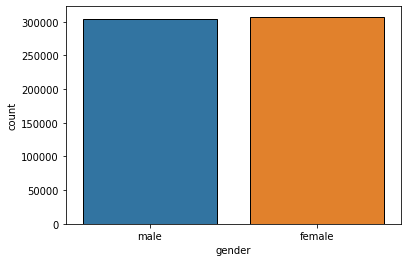

In [15]:
# Checking the distribtion of male and female
sns.countplot(x='gender',data=part1_data);

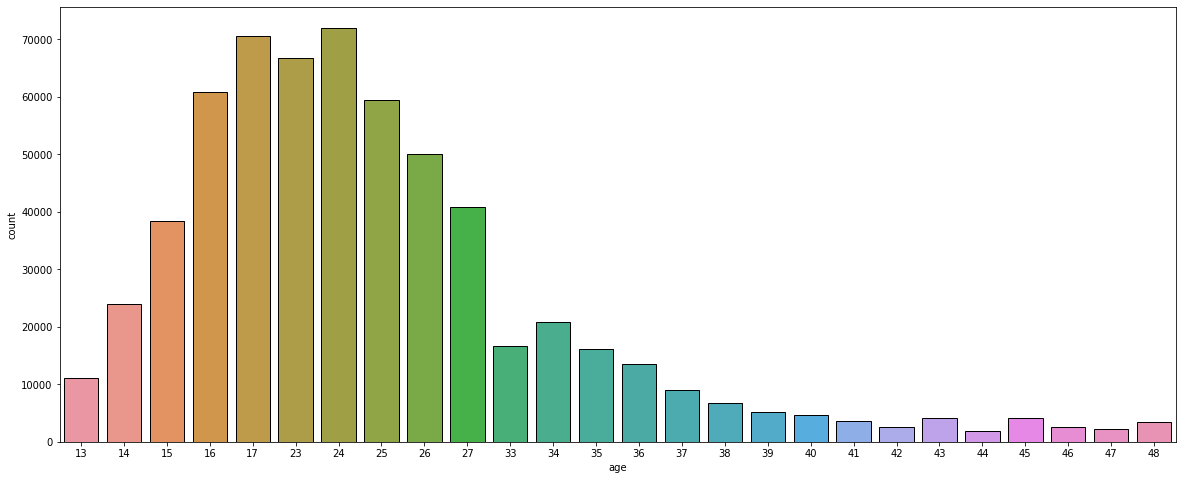

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='age',data=part1_data);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

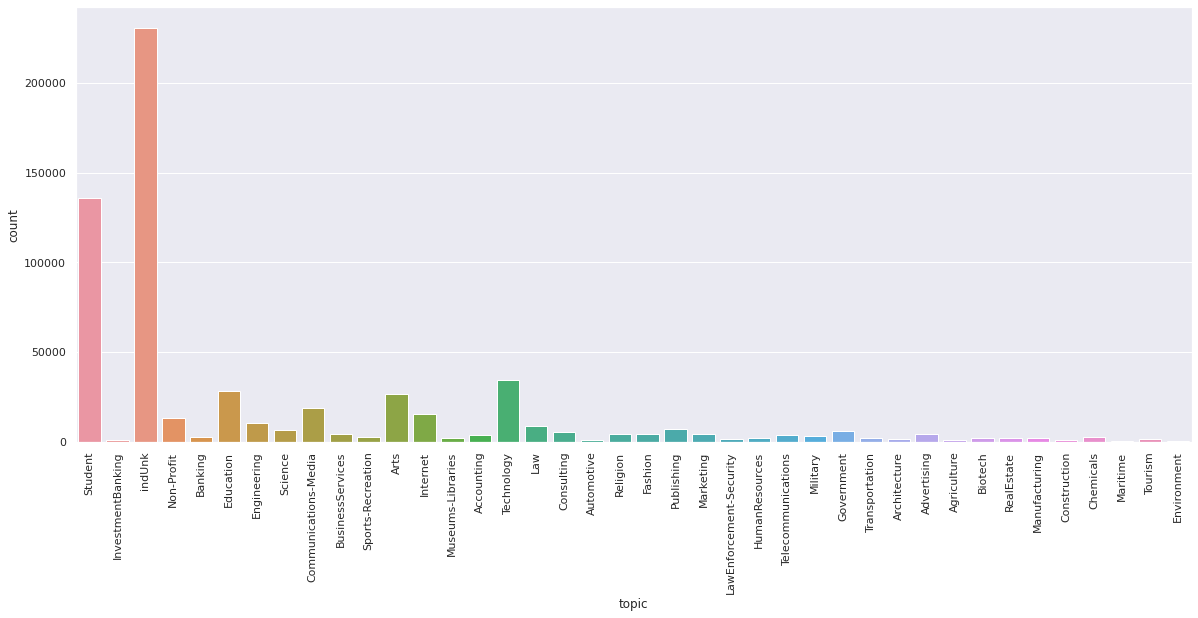

In [22]:
sns.set(rc={'figure.figsize':(15,8.27)})
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='topic',data=part1_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

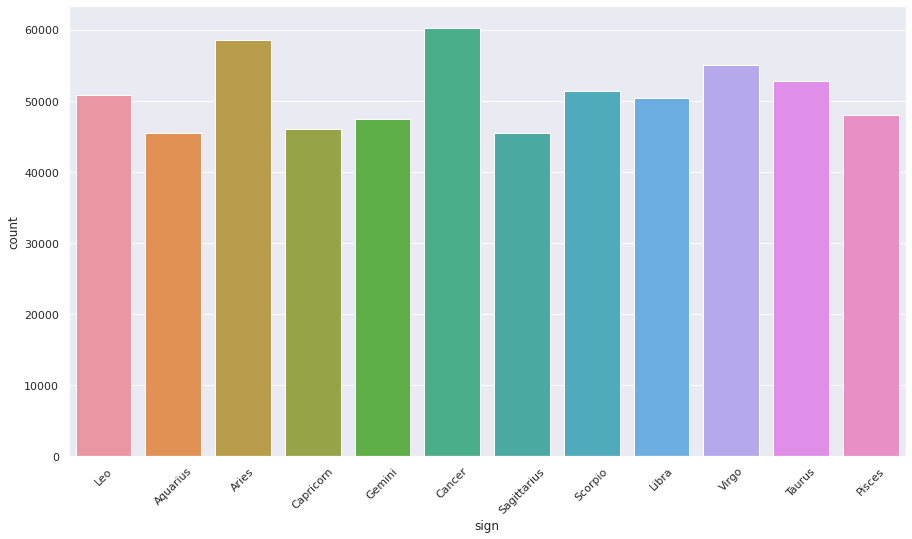

In [23]:
sns.countplot(x='sign',data=part1_data)
plt.xticks(rotation=45)

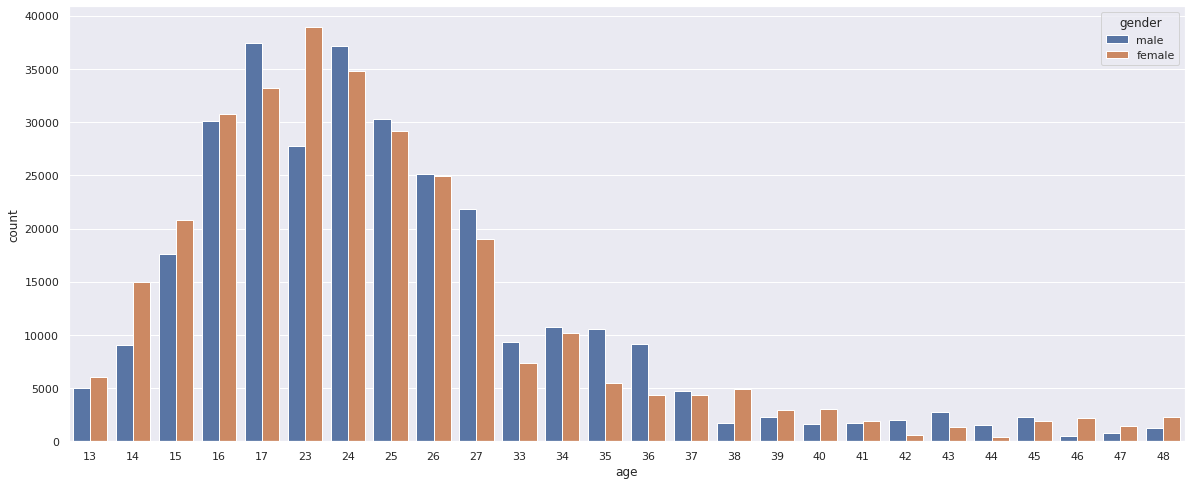

In [24]:
ig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="age", hue="gender", data=part1_data);

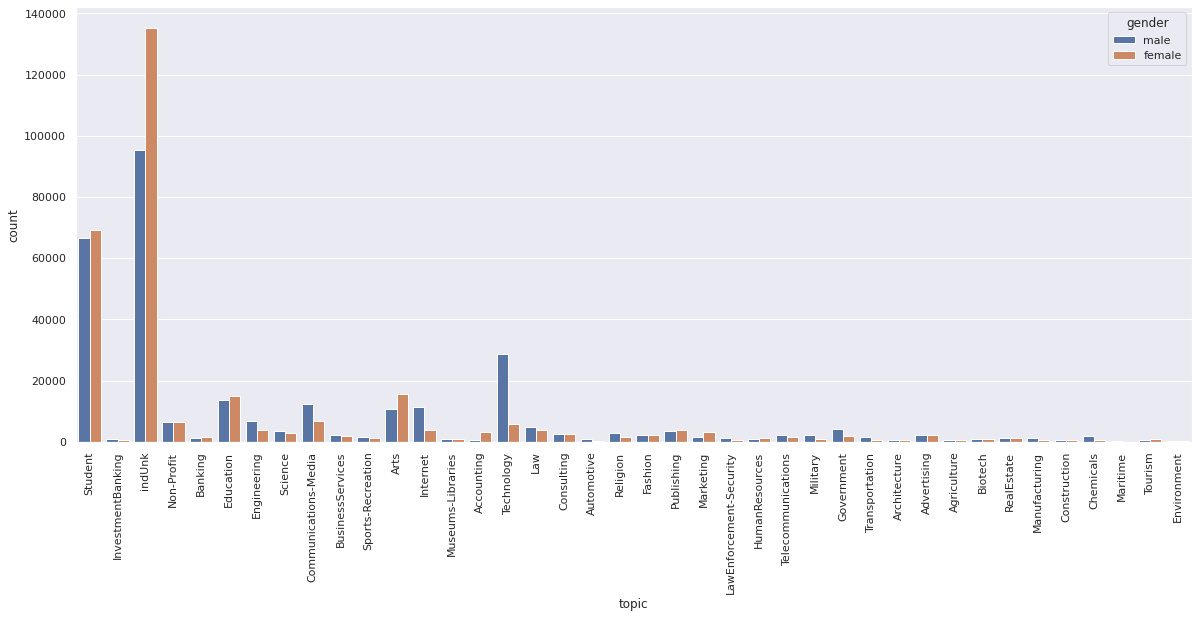

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="topic", hue="gender", data=part1_data)
plt.xticks(rotation=90);

**Checking some of the blogs**

In [26]:
part1_data['text'][0]

'           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [ ]:
part1_data['text'][10]

"             Ah, the Korean language...it looks so difficult at first, then as you figure out how to read Hanguel (Korea's surprisingly easy-to-learn alphabet of 24 characters) it seems so easy. Then the vocabulary starts. Oh no. Then the backwards (to us) sentence structure.  Yikes!  Luckily there are many options for us slow-witted foreigners to take on the language.  Of course I could list them here but  urlLink this JoongAng article  says a lot and there are more resources  urlLink here .    Well, if you're a guy here is some motivation for you: Jeon Ji Hyun (전지현), the latest 20-something (24, actually) star of movies and CFs (I hear this means Commercial Feature, but not positive).  I saw her latest movie on Sunday night.  It's hard to describe the name...the English version is 'Windstruck' but the Korean version is 여친소 (yeochinso) which is short for 내여자친구를소개합니다 (ne yeojachingu rul sogayhamnida) or 'I'd like to introduce you to my girlfriend'.  Surprisingly, both titles make sens

In [ ]:
part1_data['text'][2]

"           In het kader van kernfusie op aarde:  MAAK JE EIGEN WATERSTOFBOM   How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia  Original file dated 12th November 1990. Seemed to be a transcript of a 'Seven Days' article. Poorly formatted and corrupted. I have added the text between 'examine under a microscope' and 'malleable, like gold,' as it was missing. If anyone has the full text, please distribute. I am not responsible for the accuracy of this information. Converted to HTML by Dionisio@InfiNet.com 11/13/98. (Did a little spell-checking and some minor edits too.) Stolen from  urlLink http://my.ohio.voyager.net/~dionisio/fun/m...own-h-bomb.html  and reformatted the HTML. It now validates to XHTML 1.0 Strict. How to Build an H-Bomb Making and owning an H-bomb is the kind of challenge real Americans seek. Who wants to 

**Data preprocessing**

Firstly, the attribute 'age' ranges from 13 to 48. This is divided into three groups. Age 13-17 is classified to '10s blog', 23-27 to '20s blog' and beyond 33 is '30s blog'.

In [15]:
# converting ages into categories.
part1_data['age'].replace(np.arange(13,18),'10s blog', inplace= True)
part1_data['age'].replace(np.arange(23,28),'20s blog', inplace= True)
part1_data['age'].replace(np.arange(33,49),'30s blog', inplace= True)

In [16]:
part1_data['age'].value_counts()

20s blog    289067
10s blog    204864
30s blog    117721
Name: age, dtype: int64

In [17]:
#Converting sign into lower case
part1_data['sign'] = part1_data['sign'].str.lower()

In [18]:
#converting genders into another characterset for easier transformation of predictions. check 'classes_y' in train test split section

part1_data['gender'].replace('male','4male', inplace= True)
part1_data['gender'].replace('female','5female', inplace= True)

In [19]:
# replacing indUnk with Unknown_industry in the topic column
part1_data['topic'].replace('indUnk','Unknown_industry', inplace= True)

In [20]:
# getting unique items of each column to be used later when converting probabilities from Neural network classifier to 0s and 1s

age_unique = part1_data['age'].nunique()
gender_unique = part1_data['gender'].nunique()
topic_unique = part1_data['topic'].nunique()
sign_unique = part1_data['sign'].nunique()


**The dataset has more than 6 million data points. Model building, training and testing will take a lot of time and hence only a subset of it is considered.**

In [21]:
## subsetting the dataset, considering that the size of dataset is large, execution is taking time if more rows are included specially at the stage of model building, training, testing and execution 

part1_data_sample = part1_data.groupby('age').sample(n=17500, random_state=1)   # taking random 35000 data entries from each of the age group
part1_data_sample.reset_index(inplace=True,drop=True)
part1_data_sample.head(10)

,gender,age,topic,sign,text
0,4male,10s blog,Unknown_industry,sagittarius,"For those of you on Friendster, and mos..."
1,5female,10s blog,Unknown_industry,capricorn,"Wearing: Tool band tee, dickies, socks..."
2,4male,10s blog,Student,libra,since afternoon i've been doin nuthin o...
3,4male,10s blog,Student,sagittarius,Today: * Two point five weeks of...
4,5female,10s blog,Unknown_industry,pisces,day 3: flag day helloz aga...
5,5female,10s blog,Student,aquarius,halo..tis few days abit bus...
6,5female,10s blog,Student,taurus,ahahaha me and em are the coolest!!!!!!...
7,4male,10s blog,Unknown_industry,scorpio,"Well friends, the Englewood Beach was a..."
8,5female,10s blog,Student,virgo,Hi...i am sick and at home...m...
9,4male,10s blog,Unknown_industry,scorpio,Feeling guilty for leaving people out. ...


In [22]:
# 52.5K randomly chosen sample has been taken for limitation of computation capacity 
print('The shape of the dataframe to be used for further analysis is',part1_data_sample.shape)

The shape of the dataframe to be used for further analysis is (52500, 5)


**Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase**

In [23]:
part1_data_sample['clean_data']=part1_data_sample['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))  # keeping only english alphabets strings. removing numbers, the brackets, the full stops etc. 
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: re.sub(r'urlLink|urllink','',x))   # remove all the places where the string urllink comes
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: re.sub(r'https?\S+','',x))   # remove all the places where any url comes that starts with http or https
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: x.lower())   # lowercase each word in the string
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: x.strip())   # remove spaces
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))   # removing stop words
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: re.sub(r'\b\w{1,2}\b','',x))    # removing any word of length less than equal to 2
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: ' '.join(dict.fromkeys(x.split())))   # removing duplicate words

In [24]:
# Remove Non-English Words from Normalized text

words = set(nltk.corpus.words.words())
def remove_non_english_words(blog):
    return " ".join(w for w in nltk.wordpunct_tokenize(blog) if w.lower() in words or not w.isalpha())

part1_data_sample['clean_data'] = part1_data_sample['clean_data'].apply(remove_non_english_words)


In [25]:
# lemmatizing the text
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lmtzr.lemmatize(w) for w in w_tokenizer.tokenize(text)]

part1_data_sample['clean_data'] = part1_data_sample['clean_data'].apply(lemmatize_text)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [26]:
# stemming the text 

stemmer = SnowballStemmer("english")
part1_data_sample['clean_data'] = part1_data_sample['clean_data'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [27]:
#Comparing one arbitrary text before and after cleaning

print(part1_data_sample['text'][10],'\n')
print(part1_data_sample['clean_data'][10])

           i know, and hence the comparison to hobbes. he said life was nasty brutish and short, but also advocated a strong central ruler as able to take charge of life and preserve the common man. life was bad, but a strong central leader can overcome that he argued. i'm saying it's more like locke. life is intrinsically good. we screw it up, complicate it, and confuse ourselves to death, but there are moments in there that are just so surreally good, moments where you feel so indeniably alive, moments where no one on earth can't say that, just for an instant, everything was worth it. hell, we live in those moments. either during them, or thinking of them. dreams, memories, those times where you just zone out and mentally go to another place and time are people trying to relive those moments. life is incredibly beautiful, awesome and scary. it's like trying to hold a supernova in your hand and being vaporized, turned into dust and energy cascading on the expanding exploding wavefront

In [30]:
part1_data_sample.sample(10)

,gender,age,topic,sign,text,clean_data
2930,4male,10s blog,Student,pisces,Well well well...it has been about...4 dayz...,"[well, sinc, post, shall, break, day, hear, go..."
10901,4male,10s blog,Unknown_industry,virgo,"Wow, this game has a super good sto...","[wow, game, super, good, way, short, though, t..."
43299,5female,30s blog,Fashion,pisces,Or so says donniedarkdodotco...,"[must, insan, refrain, pleas, sinc, awak, morn..."
2584,5female,10s blog,Architecture,scorpio,E Exhausting Y Young ...,"[exhaust, young, valiant, honest, order, new, ..."
4967,4male,10s blog,Student,virgo,Today was good except for footbal...,"[today, good, except, footbal, felt, like, die..."
28040,4male,20s blog,Telecommunications,pisces,I have the greatest mom in the wo...,"[world, anyon, better, wrong, mine, awesom]"
40633,5female,30s blog,Unknown_industry,virgo,I am a winner. I have licked smoking. ...,"[winner, smoke, yesterday, done, longer, smoke..."
5684,4male,10s blog,Unknown_industry,leo,"Can I say “stressed?” Yes, ...","[say, yes, still, day, co, got, bed, around, l..."
34853,5female,20s blog,Law,cancer,I do not frequently sing Senator Jo...,"[frequent, sing, senat, allow, fail, see, surp..."
4629,4male,10s blog,Student,libra,"Well, today has been really slow....So,...","[well, today, realli, slow, crazi, true, illeg..."


**Target/label merger and transformation:**

In [28]:
#As we want to make this into a multi-label classification problem, I have merged the columns 'age', 'gender', 'topic' and 'sign' 
#together so that we have all the labels together for a particular sentence.
part1_data_sample['labels']=part1_data_sample.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)


In [29]:
# drop  gender,age,topic & sign as they are already merged to labels column

part1_data_sample.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [33]:
part1_data_sample.head()

,text,clean_data,labels
0,"For those of you on Friendster, and mos...","[see, whenev, complet, ask, love, ever, alway,...","[4male, 10s blog, Unknown_industry, sagittarius]"
1,"Wearing: Tool band tee, dickies, socks...","[wear, tool, band, tee, listen, jenni, wrap, p...","[5female, 10s blog, Unknown_industry, capricorn]"
2,since afternoon i've been doin nuthin o...,"[sinc, afternoon, yeah, see, watch, kill, bill...","[4male, 10s blog, Student, libra]"
3,Today: * Two point five weeks of...,"[today, two, point, five, math, done, six, boo...","[4male, 10s blog, Student, sagittarius]"
4,day 3: flag day helloz aga...,"[day, flag, yest, whole, class, togeth, talk, ...","[5female, 10s blog, Unknown_industry, pisces]"


In [30]:
# dividing the dataset into X and y and binarizing y label

X_small = part1_data_sample['clean_data']
y_small = part1_data_sample['labels']

multilabel_binarizer = MultiLabelBinarizer()
y_mlb=multilabel_binarizer.fit_transform(y_small)

In [31]:
classes_y= multilabel_binarizer.classes_
print(classes_y)  

['10s blog' '20s blog' '30s blog' '4male' '5female' 'Accounting'
 'Advertising' 'Agriculture' 'Architecture' 'Arts' 'Automotive' 'Banking'
 'Biotech' 'BusinessServices' 'Chemicals' 'Communications-Media'
 'Construction' 'Consulting' 'Education' 'Engineering' 'Environment'
 'Fashion' 'Government' 'HumanResources' 'Internet' 'InvestmentBanking'
 'Law' 'LawEnforcement-Security' 'Manufacturing' 'Maritime' 'Marketing'
 'Military' 'Museums-Libraries' 'Non-Profit' 'Publishing' 'RealEstate'
 'Religion' 'Science' 'Sports-Recreation' 'Student' 'Technology'
 'Telecommunications' 'Tourism' 'Transportation' 'Unknown_industry'
 'aquarius' 'aries' 'cancer' 'capricorn' 'gemini' 'leo' 'libra' 'pisces'
 'sagittarius' 'scorpio' 'taurus' 'virgo']


In [36]:
len(X_small)

52500

It can be seen that the classes are arranged beautifully, with the first three denoting age, next two denoting gender, next the topic and finally the signs. This sequence will be useful when converting output from neural network (probabilities) into a vector with 0s and 1s for further comparison. (Done later).

In [32]:
# using iterative stratification for splitting in multilabel
# defining a function multilabel_train_test_split

!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain

def multilabel_train_test_split(*arrays,
                                test_size=None,
                                train_size=None,
                                random_state=None,
                                shuffle=True,
                                stratify=None):

    # Train test split for multilabel classification. Uses the algorithm from: 
    # 'Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data'.

    if stratify is None:
        return train_test_split(*arrays, test_size=test_size,train_size=train_size,
                                random_state=random_state, stratify=None, shuffle=shuffle)
    
    assert shuffle, "Stratified train/test split is not implemented for shuffle=False"
    
    n_arrays = len(arrays)
    arrays = indexable(*arrays)
    n_samples = _num_samples(arrays[0])
    n_train, n_test = _validate_shuffle_split(
        n_samples, test_size, train_size, default_test_size=0.25
    )
    cv = MultilabelStratifiedShuffleSplit(test_size=n_test, train_size=n_train, random_state=123)
    train, test = next(cv.split(X=arrays[0], y=stratify))

    return list(
        chain.from_iterable(
            (_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays
        )
    )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
# stratified train test split

X_train_final, X_test_final, y_train_final, y_test_final = multilabel_train_test_split(X_small, y_mlb, stratify=y_mlb, test_size=0.20)

In [34]:
print('The shape of the train data is',X_train_final.shape,'\n')
print('The shape of the test data is',X_test_final.shape)

The shape of the train data is (42000,) 

The shape of the test data is (10500,)


In [35]:
print('The shape of the train data is',y_train_final.shape,'\n')
print('The shape of the test data is',y_test_final.shape)

The shape of the train data is (42000, 57) 

The shape of the test data is (10500, 57)


**Vectorisation, etc.**

In [36]:
X_train_tokens_list = X_train_final.tolist()

In [37]:
X_test_tokens_list = X_test_final.tolist()

Using Glove/word2vec

In [38]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

with open("glove.6B.300d.txt", "rb") as lines:
   w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
         for line in lines}


In [39]:
import gensim
# let X be a list of tokenized texts (i.e. list of lists of tokens)
model_w2v = gensim.models.Word2Vec(X_train_tokens_list, size=10000)
w2v = dict(zip(model_w2v.wv.index2word, model_w2v.wv.syn0))

In [40]:
class MeanEmbeddingVectorizer(object):
   def __init__(self, word2vec):
       self.word2vec = word2vec
       # if a text is empty we should return a vector of zeros
       # with the same dimensionality as all the other vectors
       # self.dim = len(word2vec.itervalues().next())
       self.dim = 10000

   def fit(self, X, y):
       return self

   def transform(self, X):
       return np.array([
           np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                   or [np.zeros(self.dim)], axis=0)
           for words in X
       ])

In [41]:
me_vector = MeanEmbeddingVectorizer(w2v)
X_train_transformed = me_vector.transform(X_train_tokens_list)
X_test_transformed = me_vector.transform(X_test_tokens_list)


In [42]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_lr=LogisticRegression(C=1.0, penalty='l2', dual=False, solver='lbfgs')
model_lr=OneVsRestClassifier(model_lr)
model_lr.fit(X_train_transformed,y_train_final)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
model_svm=LinearSVC(C=1.0, penalty='l1', dual=False, loss='squared_hinge')
model_svm=OneVsRestClassifier(model_svm)
model_svm.fit(X_train_transformed,y_train_final)

OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

In [ ]:
model_nb=MultinomialNB(alpha=1.0)
model_nb=OneVsRestClassifier(model_svm)
model_nb.fit(X_train_transformed,y_train_final)

OneVsRestClassifier(estimator=OneVsRestClassifier(estimator=LinearSVC(dual=False,
                                                                      penalty='l1')))

In [ ]:
Ypred_lr=model_lr.predict(X_test_transformed)

In [ ]:
Ypred_svm=model_svm.predict(X_test_transformed)

In [ ]:
Ypred_nb=model_nb.predict(X_test_transformed)

In [ ]:
Ypred_lr

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Ypred_svm

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Ypred_nb

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Using micro and macro average method

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    print('Average roc-auc score: Micro', roc_auc_score(Ytest, Ypred, average='micro'))
    

def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    print('Average roc-auc score: Micro', roc_auc_score(Ytest, Ypred, average='macro'))

def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted')) 



In [ ]:
display_metrics_micro(y_test_final,Ypred_lr)

Accuracy score:  0.0
F1 score: Micro 0.30020218066286375
Average precision score: Micro 0.1791677132826592
Average recall score: Micro 0.19797619047619047


In [ ]:
display_metrics_micro(y_test_final,Ypred_svm)

Accuracy score:  0.0
F1 score: Micro 0.30020218066286375
Average precision score: Micro 0.1791677132826592
Average recall score: Micro 0.19797619047619047


In [ ]:
display_metrics_micro(y_test_final,Ypred_nb)

Accuracy score:  0.0
F1 score: Micro 0.30020218066286375
Average precision score: Micro 0.1791677132826592
Average recall score: Micro 0.19797619047619047


In [ ]:
display_metrics_macro(y_test_final,Ypred_lr)

Accuracy score:  0.0
F1 score: Macro 0.03637750454223945
Average recall score: MAcro 0.032116419078517484


In [ ]:
display_metrics_macro(y_test_final,Ypred_svm)

Accuracy score:  0.0
F1 score: Macro 0.03500048137085356
Average recall score: MAcro 0.03089947716897248


In [ ]:
display_metrics_macro(y_test_final,Ypred_nb)

Accuracy score:  0.0
F1 score: Macro 0.03502684280991805
Average recall score: MAcro 0.0309070454954527


In [ ]:
display_metrics_weighted(y_test_final,Ypred_lr)

Accuracy score:  0.0
F1 score: weighted 0.2232277377220162
Average precision score: weighted 0.31362558043517197
Average recall score: weighted 0.20347619047619048


In [ ]:
display_metrics_weighted(y_test_final,Ypred_svm)

Accuracy score:  0.0
F1 score: weighted 0.21723360643489867
Average precision score: weighted 0.31236698140233427
Average recall score: weighted 0.19797619047619047


In [ ]:
display_metrics_weighted(y_test_final,Ypred_nb)

Accuracy score:  0.0
F1 score: weighted 0.21732673771059866
Average precision score: weighted 0.3123579924254211
Average recall score: weighted 0.19797619047619047


**As we can see performnce is very poor so I'll try neural networks next.GLOve/Word2Vec does'nt work well, So now I'll use Countvectorizer and train again**

**Using countvectorizer**

In [53]:
# instantiate the vectorizer
# creating bag of words which include 1-grams and 2-gram

vect = CountVectorizer(ngram_range=(1,2), analyzer=lambda x: x)

# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train_final)
X_train_transformedC = vect.transform(X_train_final)
X_test_transformedC = vect.transform(X_test_final)

print('The shape of the train data after vectorization is',X_train_transformedC.shape,'\n')
print('The shape of the test data after vectorization is',X_test_transformedC.shape)

The shape of the train data after vectorization is (42000, 22601) 

The shape of the test data after vectorization is (10500, 22601)


In [48]:
#Logistic Regression

model_lr=LogisticRegression(C=1.0, penalty='l2', dual=False, solver='lbfgs')
model_lr=OneVsRestClassifier(model_lr)
model_lr.fit(X_train_transformedC,y_train_final)

OneVsRestClassifier(estimator=LogisticRegression())

In [52]:
Ypred_lr=model_lr.predict(X_test_transformedC)

In [59]:
display_metrics_micro(y_test_final,Ypred_lr)

Accuracy score:  0.015047619047619048
F1 score: Micro 0.40801494711135305
Average precision score: Micro 0.22328202577890716
Average recall score: Micro 0.33016666666666666
Average roc-auc score: Micro 0.6542064240790656


In [60]:
display_metrics_macro(y_test_final,Ypred_lr)

Accuracy score:  0.015047619047619048
F1 score: Macro 0.10692712300853816
Average recall score: MAcro 0.08385043850126488
Average roc-auc score: Micro 0.5261197147593384


In [61]:
display_metrics_weighted(y_test_final,Ypred_lr)

Accuracy score:  0.015047619047619048
F1 score: weighted 0.364148210000865
Average precision score: weighted 0.3403076762558432
Average recall score: weighted 0.33016666666666666


In [49]:
# LinearSVC

model_svm=LinearSVC(C=1.0, penalty='l1', dual=False, loss='squared_hinge')
model_svm=OneVsRestClassifier(model_svm)
model_svm.fit(X_train_transformedC,y_train_final)

OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

In [54]:
Ypred_svm = model_svm.predict(X_test_transformedC)

In [62]:
display_metrics_micro(y_test_final,Ypred_svm)

Accuracy score:  0.01742857142857143
F1 score: Micro 0.3951811800417378
Average precision score: Micro 0.20502646449898415
Average recall score: Micro 0.3471666666666667
Average roc-auc score: Micro 0.6581179245283019


In [63]:
display_metrics_macro(y_test_final,Ypred_svm)

Accuracy score:  0.01742857142857143
F1 score: Macro 0.12790342904123625
Average recall score: MAcro 0.1071783908877871
Average roc-auc score: Micro 0.5327074097333548


In [64]:
display_metrics_weighted(y_test_final,Ypred_svm)

Accuracy score:  0.01742857142857143
F1 score: weighted 0.3720576640254426
Average precision score: weighted 0.334229197146188
Average recall score: weighted 0.3471666666666667


In [50]:
# NaiveBays 

model_nb=MultinomialNB(alpha=1.0)
model_nb=OneVsRestClassifier(model_svm)
model_nb.fit(X_train_transformedC,y_train_final)

OneVsRestClassifier(estimator=OneVsRestClassifier(estimator=LinearSVC(dual=False,
                                                                      penalty='l1')))

In [56]:
Ypred_nb = model_nb.predict(X_test_transformedC)

In [65]:
display_metrics_micro(y_test_final,Ypred_nb)

Accuracy score:  0.01742857142857143
F1 score: Micro 0.3950560396817868
Average precision score: Micro 0.20494051801150615
Average recall score: Micro 0.3470238095238095
Average roc-auc score: Micro 0.6580473944294699


In [66]:
display_metrics_macro(y_test_final,Ypred_nb)

Accuracy score:  0.01742857142857143
F1 score: Macro 0.12785381987950925
Average recall score: MAcro 0.10709372695358023
Average roc-auc score: Micro 0.5326671851592121


In [67]:
display_metrics_weighted(y_test_final,Ypred_nb)

Accuracy score:  0.01742857142857143
F1 score: weighted 0.3719499537512152
Average precision score: weighted 0.33419213259508146
Average recall score: weighted 0.3470238095238095


As we can see after using count vectorizer the performance has improved a little bit.

Design, train, tune and test the best text classifier using NN(here also I have used count vectorizer, though Glove/Word2Vec can also be used)

In [54]:
n_inputs = X_train_transformedC.shape[1]
n_outputs = y_train_final.shape[1]

model_nn = Sequential()
model_nn.add(Dense(512, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model_nn.add(BatchNormalization())

# The Hidden Layers :
model_nn.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dense(128, kernel_initializer='he_uniform',activation='relu')) 
model_nn.add(BatchNormalization())

# the output layer
model_nn.add(Dense(n_outputs, activation='sigmoid'))
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy','binary_accuracy'])

stop = EarlyStopping(monitor="val_loss", patience=3, min_delta=0.01)
model_nn.fit(X_train_transformedC, y_train_final, validation_data=(X_test_transformedC,y_test_final), verbose=1, epochs=8, batch_size = 64, callbacks=[stop])

Epoch 1/8
657/657 [==============================] - 10s 13ms/step - loss: 0.2443 - accuracy: 0.1819 - binary_accuracy: 0.9058 - val_loss: 0.1636 - val_accuracy: 0.1998 - val_binary_accuracy: 0.9388
Epoch 2/8
657/657 [==============================] - 9s 13ms/step - loss: 0.1466 - accuracy: 0.2989 - binary_accuracy: 0.9470 - val_loss: 0.1687 - val_accuracy: 0.2483 - val_binary_accuracy: 0.9371
Epoch 3/8
657/657 [==============================] - 9s 13ms/step - loss: 0.1151 - accuracy: 0.3607 - binary_accuracy: 0.9594 - val_loss: 0.1896 - val_accuracy: 0.2484 - val_binary_accuracy: 0.9349
Epoch 4/8
657/657 [==============================] - 9s 13ms/step - loss: 0.0851 - accuracy: 0.3838 - binary_accuracy: 0.9703 - val_loss: 0.2205 - val_accuracy: 0.2479 - val_binary_accuracy: 0.9312


In [55]:
# predicting X_train
y_train_pred = model_nn.predict(X_train_transformedC)

# checking some predictions along with the actual values
print(y_train_final[1],'\n')   # actual value
print(y_train_pred[1],'\n','\n')   # predicted value

print(y_train_final[10],'\n')   # actual value
print(y_train_pred[10])    # predicted value

1313/1313 [==============================] - 3s 3ms/step
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0] 

[9.66402113e-01 8.56892467e-02 7.73700478e-04 9.87580538e-01
 1.43024903e-02 8.34997219e-04 7.88929465e-04 8.90534313e-04
 1.42118311e-03 2.70705926e-03 4.91743907e-04 5.42308029e-04
 1.03831303e-03 3.71539663e-03 3.11507797e-03 5.59122115e-03
 3.07121722e-04 7.29003630e-04 3.84064997e-03 3.89386085e-03
 9.83903883e-05 1.60178938e-03 2.85113743e-03 2.77757266e-04
 1.20911968e-03 2.68865027e-04 1.46753562e-03 4.81324067e-04
 3.05051520e-03 3.90810397e-04 8.95234698e-04 2.98806909e-03
 6.06627902e-04 9.10445210e-03 1.52945775e-03 1.20918942e-03
 4.11415100e-03 1.95598602e-03 5.65388985e-03 9.39132750e-01
 2.94766016e-03 1.14307208e-04 7.24753540e-04 7.05079932e-04
 1.20065957e-01 7.10399598e-02 4.63501140e-02 1.61634758e-01
 2.37101033e-01 3.36926207e-02 1.39137963e-02 1.13145314e-01
 1.60666890e-02 4.52586040e-02 

As it can be seen that the result from predicting through neural network model has probabilities. To convert it into 0s and 1s, it is needed that we need 1s at 4 places corresponding to each label. Below is a function that will return 1 for each of the 4 labels.

After this conversion, the accuracy is measured in two ways for the multilabel classification problem.

In [56]:
# function to convert y_predicted from probabilities to 1 and 0

def y_convert(y_true, y_predict):
  y_each_dummy = [0] * y_true.shape[1]   # dummy list of size of the labels (57) that will store 1s for each of the datapoint
  
  m = y_true.shape[0]
  n = y_true.shape[1]
  y_predict_final = [[0 for x in range(n)] for x in range(m)]   # final predicted y with 0s and 1s, with 1 at the location where the probability for a particular label is highest

  k = 0

  for pred_y in y_predict:

    pred_y = list (pred_y)
    index_age = pred_y.index(max(pred_y[0:age_unique]))    # getting the max probability in the first three for ages
    index_gender = age_unique +  pred_y[age_unique:(age_unique+gender_unique)].index(max(pred_y[age_unique:(age_unique+gender_unique)]))    # getting the max probability in the next two for gender
    index_topic = age_unique + gender_unique +  pred_y[(age_unique+gender_unique):(age_unique+gender_unique+topic_unique)].index(max(pred_y[(age_unique+gender_unique):(age_unique+gender_unique+topic_unique)]))    # getting the max probability in the next 40 for topic
    index_sign = age_unique + gender_unique + topic_unique + pred_y[(age_unique+gender_unique+topic_unique):(age_unique+gender_unique+topic_unique+sign_unique)].index(max(pred_y[(age_unique+gender_unique+topic_unique):(age_unique+gender_unique+topic_unique+sign_unique)]))    # getting the max probability in the last 12 for signs
    indexes = [index_age, index_gender, index_topic, index_sign]

    for index in indexes:
      y_each_dummy[index] = 1

    y_predict_final[k] = y_each_dummy
    y_each_dummy = [0] * y_true.shape[1]
    k = k+1

  return y_predict_final

In [57]:
# function to compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )

        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )

        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [58]:
# predicting X_train

y_train_pred_final = y_convert(y_train_final, y_train_pred)  # converting the probabilities to 0s and 1s
accuracy_train = accuracy_score(y_train_final, y_train_pred_final)   # also known as exact match ratio
hamming_score_train = hamming_score(y_train_final, y_train_pred_final)    
hamming_loss_train = sklearn.metrics.hamming_loss(y_train_final, y_train_pred_final)

print('The accuracy for the train data (exact match) is', accuracy_train,'\n')
print('The hamming score for the train data is',hamming_score_train,'\n')
print('The hamming loss for the train data is', hamming_loss_train)

The accuracy for the train data (exact match) is 0.6275714285714286 

The hamming score for the train data is 0.8158485260770975 

The hamming loss for the train data is 0.018048454469507102


In [59]:
# predicting x_test

y_test_pred = model_nn.predict(X_test_transformedC)
y_test_pred_final = y_convert(y_test_final, y_test_pred)
accuracy_test = accuracy_score(y_test_final, y_test_pred_final)   # also known as exact match ratio
hamming_score_test = hamming_score(y_test_final, y_test_pred_final)
hamming_loss_test = sklearn.metrics.hamming_loss(y_test_final, y_test_pred_final)

print('The accuracy for the test data (exact match) is', accuracy_test,'\n')
print('The hamming score for the test data is',hamming_score_test,'\n')
print('The hamming loss for the test data is', hamming_loss_test)


329/329 [==============================] - 1s 3ms/step
The accuracy for the test data (exact match) is 0.03552380952380953 

The hamming score for the test data is 0.295415873015873 

The hamming loss for the test data is 0.0821687552213868


In [60]:
print("\n Detailed Classification report for the train data : \n", metrics.classification_report(y_train_final, y_train_pred_final))
classification_report_test = metrics.classification_report(y_test_final, y_test_pred_final, output_dict=True)
print("\n Detailed Classification report for the test data : \n", metrics.classification_report(y_test_final, y_test_pred_final))



 Detailed Classification report for the train data : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     14000
           1       0.94      0.91      0.92     14000
           2       0.91      0.96      0.93     14000
           3       0.94      0.97      0.95     21045
           4       0.97      0.94      0.95     20955
           5       0.82      0.57      0.67       284
           6       0.92      0.33      0.48       310
           7       1.00      0.04      0.08        73
           8       1.00      0.01      0.02        86
           9       0.78      0.71      0.74      1811
          10       1.00      0.12      0.21       100
          11       0.74      0.15      0.25       190
          12       1.00      0.11      0.20       117
          13       0.81      0.40      0.54       285
          14       0.78      0.17      0.27       126
          15       0.71      0.68      0.69      1236
          16       1.00  

**Observations**


1.   The micro average f1 score is 0.41 while the macro average is 0.12 . In micro-averaging all TPs, TNs, FPs and FNs for each class are summed up and then the average is taken 
 while in macro-averaging we just take the average of the precision and recall of the system on different sets.
2.   The accuracy(exact match ratio) on the train data is 62%(approx) while on the test data it is 3.68%(approx).
3.   The hamming score on the train data is 81.5 % while on the test data it is 29.5 %
4.  The accuracy obtained on the test data is quite low compared to the train data. This might be the result of big variation in the test and train data. 
 Although the train test split was done in a stratified manner, the labels are imbalanced which might be one of the reasons behind the low accuracy on the test data.

5. Word2Vec and Glove were also tried to represent sentences using word embeddings but it resulted in ever poorer results so I did'nt use that while using NN.

6. The Neural network classifier uses sigmoid activation with binary crossentropy loss as it is a multilabel classification problem. OnevsRest 
 together with logistic regression was tried but it kills the essence of the problem that we need multilabels as output. Hence that is not shown in the report.




In [61]:
#function to display confusion matrix in a heatmap for each label

confusion_matrix_test = multilabel_confusion_matrix(y_test_final, y_test_pred_final)

def confusion_per_label(label):
  plt.figure(figsize=(6,6))
  plt.title('Confusion matrix for label {}:'.format(classes_y[label]))
  sns.heatmap(confusion_matrix_test[label], cmap='YlGnBu', annot=True, fmt=".0f").set(xlabel='Predicted',ylabel='Actual')

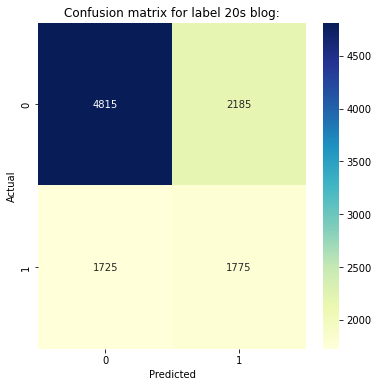

In [62]:
#printing confusion matrix for first five labels.

confusion_per_label(1)

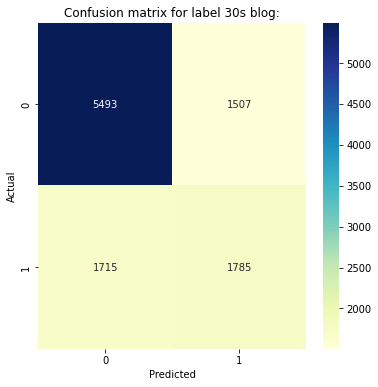

In [63]:
confusion_per_label(2)

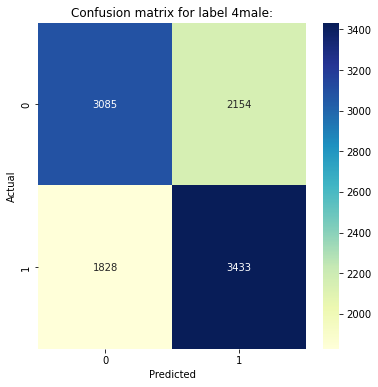

In [64]:
confusion_per_label(3)

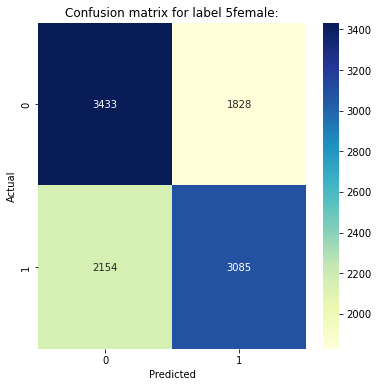

In [65]:
confusion_per_label(4)

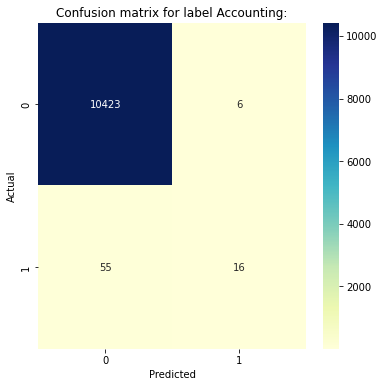

In [66]:
confusion_per_label(5)

Print the true vs predicted labels for any 5 entries from the dataset.

In [67]:
# inverse transform from 0s and 1s in labels to name of labels

y_train_act_5 = multilabel_binarizer.inverse_transform(np.array(y_train_final))[5:10]   # stores 5 entries of actual train labels
y_train_pred_5 = multilabel_binarizer.inverse_transform(np.array(y_train_pred_final))[5:10]    # stores 5 entries of predicted train labels


In [68]:
y_train_act_5

[('10s blog', '5female', 'Student', 'virgo'),
 ('10s blog', '4male', 'Unknown_industry', 'scorpio'),
 ('10s blog', '5female', 'Unknown_industry', 'aries'),
 ('10s blog', '5female', 'Student', 'taurus'),
 ('10s blog', '5female', 'Student', 'pisces')]

In [69]:
y_train_pred_5

[('10s blog', '5female', 'Student', 'sagittarius'),
 ('10s blog', '4male', 'Unknown_industry', 'scorpio'),
 ('10s blog', '5female', 'Unknown_industry', 'aries'),
 ('30s blog', '5female', 'Unknown_industry', 'sagittarius'),
 ('10s blog', '5female', 'Student', 'pisces')]

In [70]:
y_test_act_5 = multilabel_binarizer.inverse_transform(np.array(y_test_final))[5:10]   # stores 5 entries of actual test labels
y_test_pred_5 = multilabel_binarizer.inverse_transform(np.array(y_test_pred_final))[5:10]    # stores 5 entries of predicted test labels

In [71]:
y_test_act_5

[('10s blog', '5female', 'Unknown_industry', 'capricorn'),
 ('10s blog', '4male', 'Unknown_industry', 'cancer'),
 ('10s blog', '4male', 'Student', 'aries'),
 ('10s blog', '5female', 'Student', 'leo'),
 ('10s blog', '4male', 'Non-Profit', 'gemini')]

**Part B(Chat Bot)**

# CONTEXT: 
An edtech company has a an academic support department which receives numerous support requests every day throughout the year. 
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy 
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper 
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with 
the user, understand the problem and display the resolution procedure [if found as a generic request] or redirect the request to an actual human 
support executive if the request is complex or not in it’s database.

# DATA DESCRIPTION: 
A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.

# OBJECTIVE:
Design a python based interactive semi - rule based chatbot

Opening and reading the json file 

In [72]:
with open('GL Bot.json') as file:
  Corpus = json.load(file)

In [73]:
print(Corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [80]:
import json
import string
import random 
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
# initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()
# Each list to create
words = []
classes = []
doc_X = []
doc_y = []
# Loop through all the intents
# tokenize each pattern and append tokens to words, the patterns and
# the associated tag to their associated list
for intent in Corpus["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)
        doc_X.append(pattern)
        doc_y.append(intent["tag"])
    
    # add the tag to the classes if it's not there already 
    if intent["tag"] not in classes:
        classes.append(intent["tag"])
# lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]
# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

In [82]:
print(words)

['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimizer', 'parameter', 'piece', 'please', 'pm', 'problem', 'propagation', 'random', 'regression', 'relu', 'screw', 'see', 'sg

In [83]:
print(classes)

['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']


In [84]:
print(doc_X)

['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time', 'thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy', 'olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with olympus', 'olypus is not a good tool', 'lot of problems with olympus', 'how to use olympus', 'teach me olympus', 'i am not able to understand svm', 'explain me how machine learning works', 'i am not able to understand naive bayes', 'i am n

In [85]:
print(doc_y)

['Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Tick

In [86]:
# list for training data
training = []
out_empty = [0] * len(classes)
# creating the bag of words model
for idx, doc in enumerate(doc_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated
    # to
    output_row = list(out_empty)
    output_row[classes.index(doc_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

In [87]:
# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])
epochs = 200
# the deep learning model
model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation = "softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])
print(model.summary())
model.fit(x=train_X, y=train_y, epochs=200, verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               20352     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
Total params: 29,128
Trainable params: 29,128
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
4/4 [============================

In [88]:
def clean_text(text): 
  tokens = nltk.word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

def bag_of_words(text, vocab): 
  tokens = clean_text(text)
  bow = [0] * len(vocab)
  for w in tokens: 
    for idx, word in enumerate(vocab):
      if word == w: 
        bow[idx] = 1
  return np.array(bow)

def pred_class(text, vocab, labels): 
  bow = bag_of_words(text, vocab)
  result = model.predict(np.array([bow]))[0]
  thresh = 0.2
  y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

  y_pred.sort(key=lambda x: x[1], reverse=True)
  return_list = []
  for r in y_pred:
    return_list.append(labels[r[0]])
  return return_list

def get_response(intents_list, intents_json): 
  tag = intents_list[0]
  list_of_intents = intents_json["intents"]
  for i in list_of_intents: 
    if i["tag"] == tag:
      result = random.choice(i["responses"])
      break
  return result

In [111]:
# running the chatbot
print("BOT: My name is Ani. Let's have a conversation! Also, if you want to exit any time, just type stop!")
while True:
    message = input("").lower()
    intents = pred_class(message, words, classes)
    result = get_response(intents, Corpus)
    print(result)
    if message == "stop":
      print("OK Bye!")
      break

BOT: My name is Ani. Let's have a conversation! Also, if you want to exit any time, just type stop!
Hi, can you tell me what is svc?
1/1 [==============================] - 0s 15ms/step
Hello! how can i help you ?
what is svc?
1/1 [==============================] - 0s 16ms/step
Hello! how can i help you ?
what is knn?
1/1 [==============================] - 0s 15ms/step
Link: Machine Learning wiki 
what is logistic regression
1/1 [==============================] - 0s 15ms/step
Link: Machine Learning wiki 
what's with this crap response?
1/1 [==============================] - 0s 16ms/step
Link: Neural Nets wiki
you are so stupid
1/1 [==============================] - 0s 15ms/step
Please use respectful words
not at all satisfied
1/1 [==============================] - 0s 15ms/step
Tarnsferring the request to your PM
stop
1/1 [==============================] - 0s 14ms/step
Hello! how can i help you ?
OK Bye!
